## Data dictionary:

Index: Row index

user id: User ID (unique)

test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
converted: If a person bought the product then True, else is False

total ads: Amount of ads seen by person

most ads day: Day that the person saw the biggest amount of ads

most ads hour: Hour of day that the person saw the biggest amount of ads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('marketing_AB.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
df.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [9]:
df.nunique()

Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [10]:
df['test group'].value_counts()

ad     564577
psa     23524
Name: test group, dtype: int64

In [11]:
df['converted'].value_counts()

False    573258
True      14843
Name: converted, dtype: int64

In [12]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [13]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


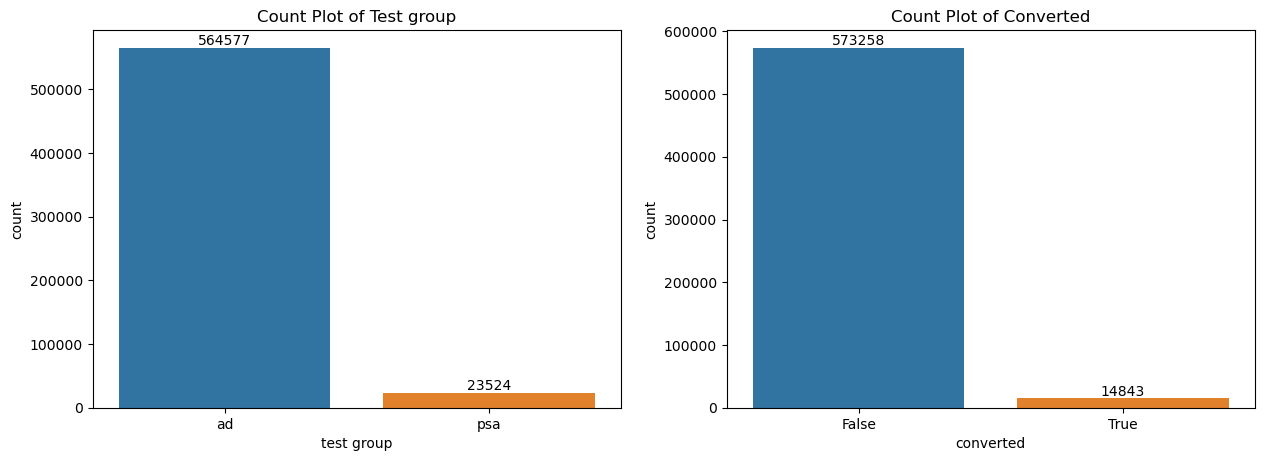

In [18]:
columns_to_plot = ['test group', 'converted']

fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), dpi=100)

for i, col in enumerate(columns_to_plot):
    # Count plot for the current column with count labels
    sns.countplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'Count Plot of {col.capitalize()}')
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


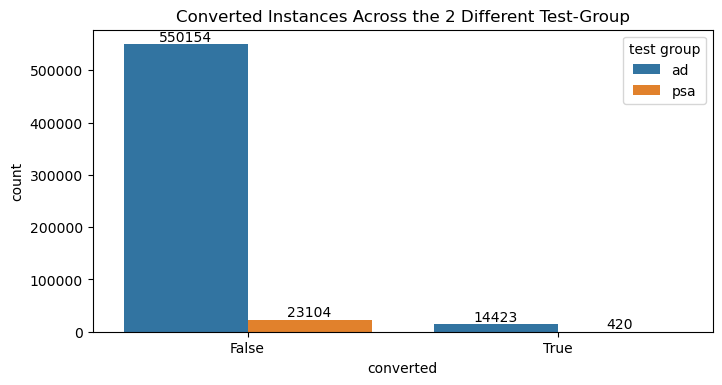

In [20]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=df, x='converted', hue='test group')
plt.title('Converted Instances Across the 2 Different Test-Group')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

## Insights

### ad test group converted more than psa, so this can indicate that adversting is more important in sales.

### To evaluate this hypothesis and also to understand that there is a significant difference between the ad and psa groups, we should take Statistics Tests such as ABTest, and Independent TTest.




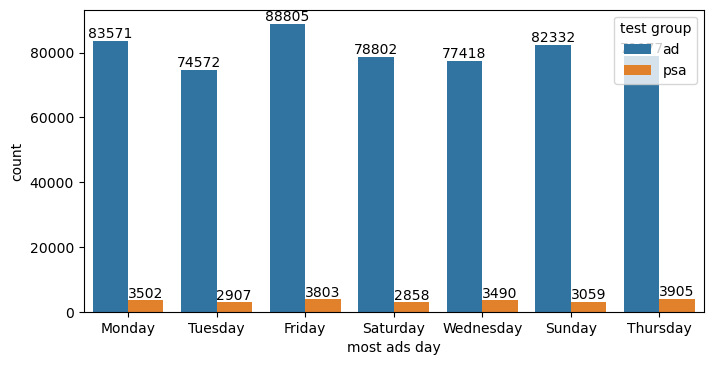

In [24]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=df, x='most ads day', hue='test group')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

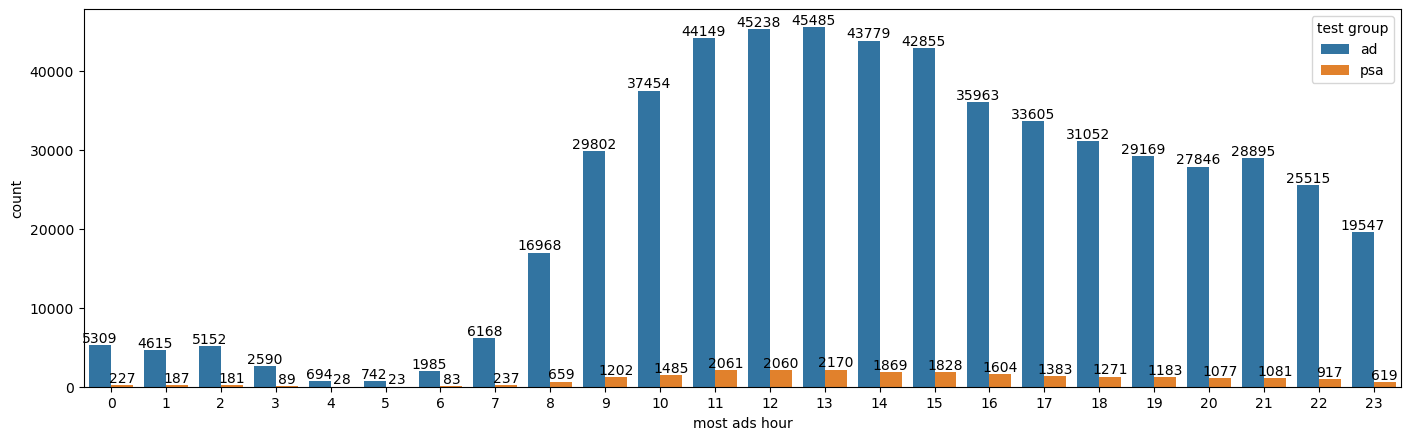

In [29]:
plt.figure(figsize=(17, 5), dpi=100)
sns.countplot(data=df,x='most ads hour', hue='test group')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

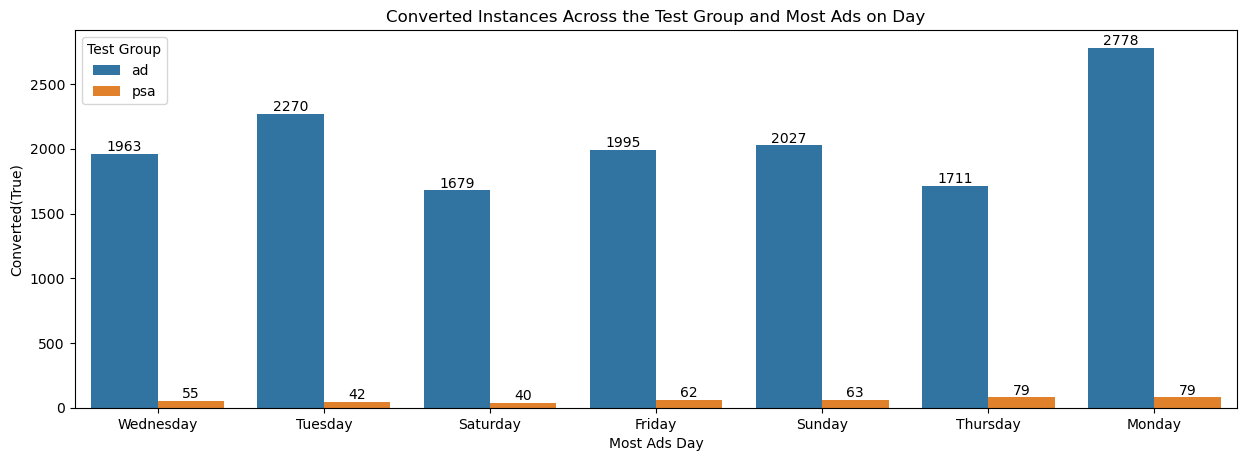

In [31]:
# Create a count plot for 'test group', 'most ads day', and 'converted' values
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(data=data[data['converted'] == True], x='most ads day', hue='test group')

plt.title('Converted Instances Across the Test Group and Most Ads on Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Converted(True)')
plt.legend(title='Test Group', loc='upper left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

## Insights

### Most people are interested to buy in 11 - 15 hr
### Most ads are displayed on Friday
### Most people are converted on Monday

## Chi-square Test:

The chi-square test for independence is suitable for comparing categorical variables to determine if they are independent or associated. In this case, it can help determine if there's a significant difference in buying behavior between the ad and psa groups.

Chi-square test measures the association between two categorical variables. It compares the observed frequencies of the categories with the frequencies that would be expected if the two variables were independent.
The test generates a chi-square statistic and a p-value. A low p-value indicates that the variables are dependent, rejecting the null hypothesis.

There are two approaches to calculate the Chi2Test:

From scratch

Using stats.chi2_contingency

It should be mentioned that in both approaches, in the first step, we should create a crosstab between converted and test group columns.

In [33]:
chi2 = pd.crosstab(df['converted'], df['test group'], margins=True)
chi2

test group,ad,psa,All
converted,,,
False,550154,23104,573258
True,14423,420,14843
All,564577,23524,588101


In [34]:
# Chi2Test from the scratch

# observation
obs = np.append(chi2.iloc[0][: -1].values, chi2.iloc[1][: -1].values)

row_sum = chi2.iloc[0: 2, 2].values

# calculation
exp = []
for j in range(2):
    for val in chi2.iloc[2, : -1].values:
        # print(val, ' * ', row_sum[j], ' / ', chi2.loc['All', 'All'], ' = ', val * row_sum[j] / chi2.loc['All', 'All'])
        exp.append(val * row_sum[j] / chi2.loc['All', 'All'])

# degree of freedom
dof = (len(row_sum) - 1) * (len(chi2.iloc[2, :-1].values) - 1)

# converted vs test group
print(f'The result of Chi2Test:\ndof = {dof}\nP-value = {1 - stats.chi2.cdf(((obs - exp) ** 2 / exp).sum(), dof)}')

The result of Chi2Test:
dof = 1
P-value = 1.7053025658242404e-13


In [35]:
# Chi2Test from stats

obs = np.array([chi2.iloc[0][: -1].values, chi2.iloc[1][: -1].values])
statistic, pvalue, dof, expected_freq = stats.chi2_contingency(obs)
print(f'The result of Chi2Test:\nChi-square statistic = {statistic:.2f}\nDegree of Freedom = {dof}\nP-value = {pvalue:.2f}')

The result of Chi2Test:
Chi-square statistic = 54.01
Degree of Freedom = 1
P-value = 0.00


The P-value is close to 0, which means there is good evidence to reject the null hypothesis. Our threshold rejecting the Null is usually less than 0.05.

So, according to the result of the Chi2Test, we can see that there is a relation between the test group and converted features.

## Binomial Distribution

For evaluating the ABTest between the ad and psa, we can use binomial distribution according to the following code blocks.



In [37]:
df_psa = df[df['test group']=='psa']
df_ad = df[df['test group']=='ad']

In [38]:
ad_converted = np.random.choice([1, 0], size=len(df_ad), p=[df.converted.mean(), (1 - df.converted.mean())])
psa_converted = np.random.choice([1, 0], size=len(df_psa), p=[df.converted.mean(), (1 - df.converted.mean())])

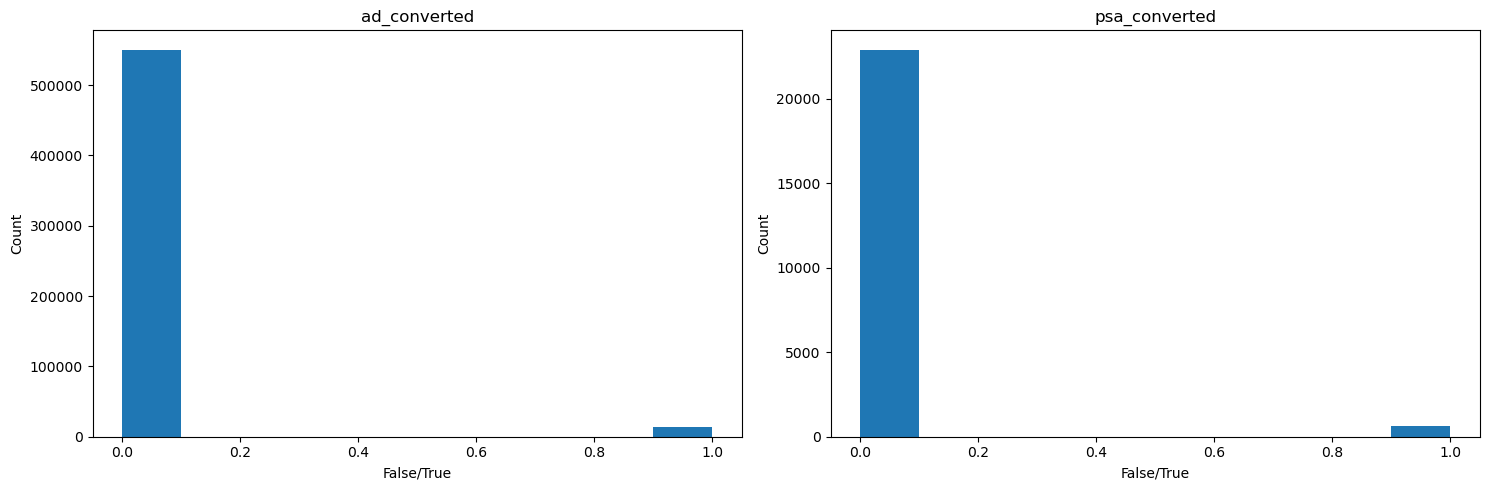

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=100)
ax1.hist(ad_converted);
ax2.hist(psa_converted);
ax1.set(title='ad_converted', xlabel='False/True', ylabel='Count');
ax2.set(title='psa_converted', xlabel='False/True', ylabel='Count');
plt.tight_layout()

Step 1: Generating Random Samples

Using numpy's random.binomial() function, random samples of conversions are generated for both the ad and psa groups.

The number of trials is set to the length of each group, and the probability of success (conversion rate) is set to the overall conversion rate from the entire dataset.

Step 2: Calculating Differences

Differences in conversion rates between the ad and psa groups are computed for each random sample.

Additionally, the actual difference in conversion rates between the ad and psa groups in the original dataset is calculated.

Step 3: Printing Results

The mean of differences of conversion rates from the random samples and the mean difference from the original dataset are printed.

The p-value is calculated as the proportion of random samples that have a difference greater than the actual difference observed in the original dataset.

In [41]:
# Generate random samples for ad and psa groups
ad_converted = np.random.binomial(len(df_ad), df.converted.mean(), 10000) / len(df_ad)
psa_converted = np.random.binomial(len(df_psa), df.converted.mean(), 10000) / len(df_psa)

# Calculate differences
mean_diffs = ad_converted - psa_converted
actual_diff = df_ad['converted'].mean() - df_psa['converted'].mean()

# Print results
print("Results of AB Test Simulation:")
print("----------------------------------------------------")
print(f"Mean difference of randomly generated instances: {mean_diffs.mean():.5f}")
print(f"Actual difference between ad and psa groups: {actual_diff:.5f}")
p_value = (mean_diffs > actual_diff).mean()
print(f"P-value: {p_value * 100:.2f}%")
print("----------------------------------------------------")
if p_value < 0.05:
    print("There is a significant difference in conversion rates between ad and psa groups.")
else:
    print("There is no significant difference in conversion rates between ad and psa groups.")

Results of AB Test Simulation:
----------------------------------------------------
Mean difference of randomly generated instances: 0.00001
Actual difference between ad and psa groups: 0.00769
P-value: 0.00%
----------------------------------------------------
There is a significant difference in conversion rates between ad and psa groups.


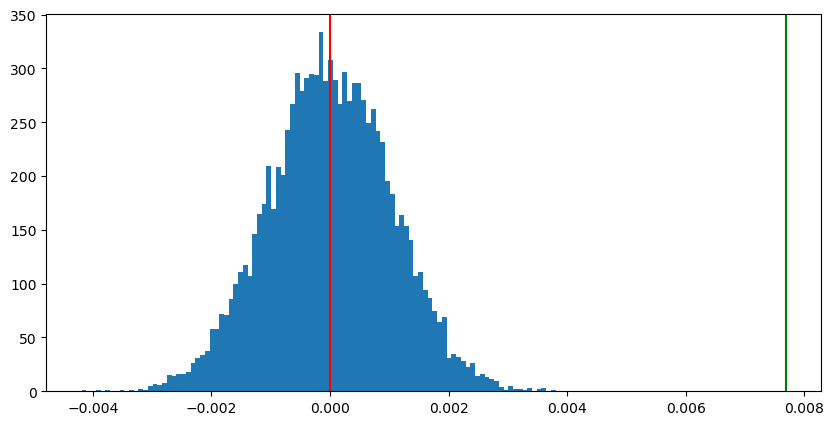

In [43]:
plt.figure(figsize=(10, 5), dpi=100)
plt.hist(mean_diffs, bins=100)
low = actual_diff
height = mean_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

The differences between the green and red lines of the above chart confirm that there is a significant difference in conversion rates between ad and psa groups.

## G TEST

The G-test (also known as the likelihood ratio test) is similar to the chi-square test but has some advantages, especially when dealing with small sample sizes. 

It's particularly useful when expected cell frequencies are small.

The G-test measures the difference between observed and expected frequencies under the null hypothesis.

It calculates the likelihood ratio between the observed data and the expected data.

In [44]:
# G-Test
contingency_table = pd.crosstab(df['test group'], df['converted'])
g_stat, p_val, _, _ = stats.chi2_contingency(contingency_table, lambda_="log-likelihood")
print("G-test statistic:", g_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in conversion rates between the ad and psa groups using G-test.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in conversion rates between the ad and psa groups using G-test.")

G-test statistic: 59.782230158204584
P-value: 1.059557167561035e-14
Reject Null Hypothesis: There is a significant difference in conversion rates between the ad and psa groups using G-test.
